In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs


In [116]:
set_seed = 42

# 1. 生成正常样本（3个聚类）
X_normal, _ = make_blobs(n_samples=400, centers=3, cluster_std=0.6, random_state=42)
# 2. 生成异常样本（随机分布在 [-5,5] 范围内）
X_outliers = np.random.uniform(low=-5, high=5, size=(50, 2))
# 3. 合并数据（正常样本 + 异常样本）
X = np.vstack([X_normal, X_outliers])
# 4. 标记真实标签（0=正常，1=异常，仅用于后续评估）
y_true = np.hstack([np.zeros(400), np.ones(50)])

/var/folders/5q/wdcm6zlj25xb532rzm7qm1f40000gn/T/ipykernel_17961/3848957560.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(X_normal[:, 0], X_normal[:, 1], c="blue", cmap="bwr", label="正常样本", alpha=0.6)
/Users/james/Applications/anaconda3/lib/python3.11/site-packages/matplotlib/collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


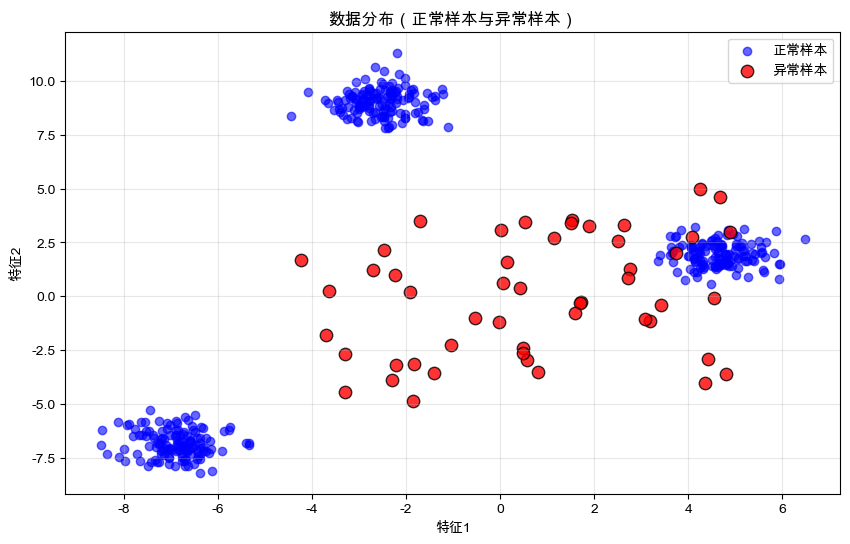

In [133]:
plt.figure(figsize=(10, 6))

# 绘制正常样本（预测为0）
scatter = plt.scatter(X_normal[:, 0], X_normal[:, 1], c="blue", cmap="bwr", label="正常样本", alpha=0.6)
# 绘制异常样本（预测为1）
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="red", label="异常样本", alpha=0.8, s=80, edgecolors="black")
handles, labels = scatter.legend_elements()

plt.xlabel("特征1")
plt.ylabel("特征2")
plt.title("数据分布（正常样本与异常样本）")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [117]:
# 1. 初始化孤立森林模型
model = IsolationForest(
    n_estimators=100,        # 100棵孤立树
    max_samples="auto",      # 每棵树用 min(256, 样本数) 个样本
    contamination=0.1,       # 假设异常比例约10%（50/(400+50)≈0.11）
    random_state=42
)


In [118]:

# 2. 训练模型（无监督，无需传入标签）
model.fit(X)


IsolationForest(contamination=0.1, random_state=42)

In [119]:

# 3. 预测结果
y_pred = model.predict(X)  # 输出：1=正常，-1=异常（需转换为0/1便于后续分析）
# y_pred

In [120]:

y_pred = np.where(y_pred == 1, 0, 1)  # 转换后：0=正常，1=异常


In [121]:

# 4. 获取异常分数（可选，用于更精细的阈值调整）
anomaly_scores = model.decision_function(X)  # 分数≤0 判定为异常（对应 predict=-1）

In [122]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("准确率（Accuracy）:", accuracy_score(y_true, y_pred))
print("精确率（Precision）:", precision_score(y_true, y_pred))
print("召回率（Recall）:", recall_score(y_true, y_pred))
print("F1分数:", f1_score(y_true, y_pred))

# 输出示例（因随机种子固定，结果可复现）：
# 准确率（Accuracy）: 0.9466666666666667
# 精确率（Precision）: 0.8518518518518519
# 召回率（Recall）: 0.78
# F1分数: 0.8140703517587939

准确率（Accuracy）: 0.9177777777777778
精确率（Precision）: 0.6444444444444445
召回率（Recall）: 0.58
F1分数: 0.6105263157894737


In [129]:
X.size

900

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


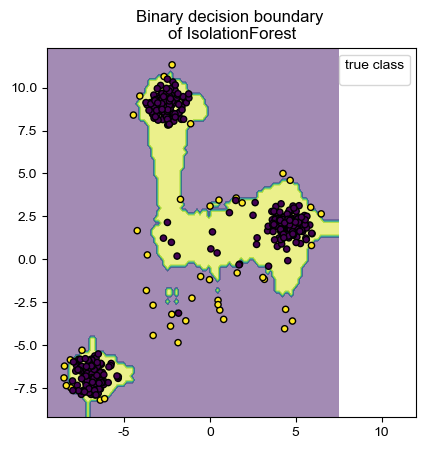

In [141]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="predict",
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, edgecolor="k")
disp.ax_.set_title("Binary decision boundary \nof IsolationForest")
plt.axis("square")
plt.legend(handles=handles, labels=["正常样本", "异常样本"], title="true class")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


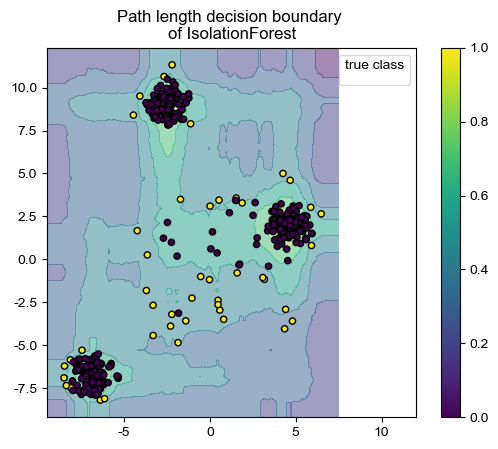

In [139]:
disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="decision_function",
    alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, edgecolor="k")
disp.ax_.set_title("Path length decision boundary \nof IsolationForest")
plt.axis("square")
plt.legend(handles=handles, labels=["异常样本", "正常样本"], title="true class")
plt.colorbar(disp.ax_.collections[1])
plt.show()

In [96]:

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False


In [111]:
# X[y_pred == 0, 0]
# y_pred

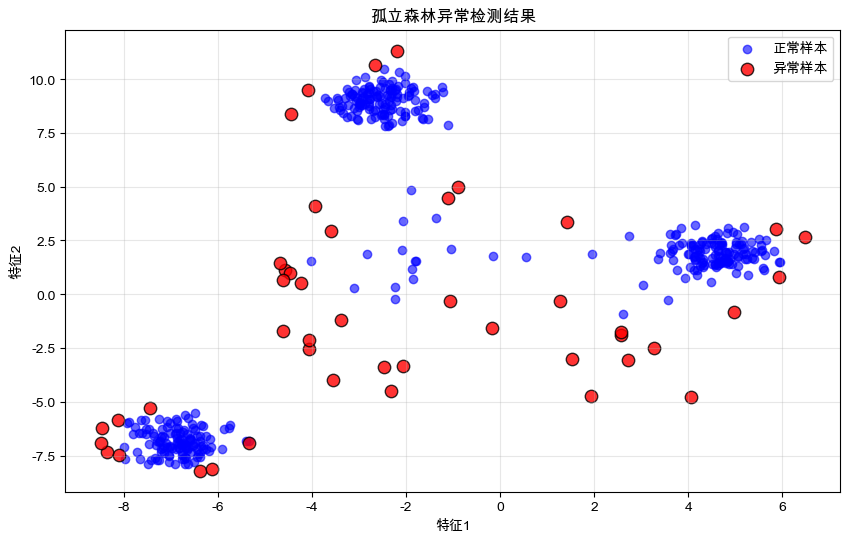

In [98]:
plt.figure(figsize=(10, 6))

# 绘制正常样本（预测为0）
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], c="blue", label="正常样本", alpha=0.6)
# 绘制异常样本（预测为1）
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c="red", label="异常样本", alpha=0.8, s=80, edgecolors="black")

plt.xlabel("特征1")
plt.ylabel("特征2")
plt.title("孤立森林异常检测结果")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Iris 数据集
- https://juejin.cn/post/7345356037404852250

In [99]:
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

In [100]:
from sklearn.datasets import load_iris

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data


In [101]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [102]:
# 创建Isolation Forest模型
model = IsolationForest(contamination=0.1)

# 训练模型
model.fit(X)


IsolationForest(contamination=0.1)

In [103]:
# 预测异常点
y_pred = model.predict(X)

# 将异常点标记为-1，正常点标记为1
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1


In [104]:
X[:, 0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

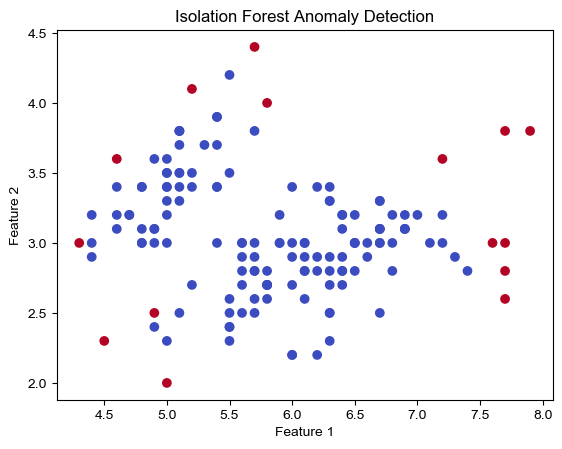

In [105]:
# 绘制异常点的分布
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Isolation Forest Anomaly Detection')
plt.show()


In [106]:
import numpy as np

from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

In [107]:
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

In [108]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [109]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py
import numpy as np

from sklearn.model_selection import train_test_split


In [110]:

n_samples, n_outliers = 120, 40
rng = np.random.RandomState(0)
covariance = np.array([[0.5, -0.1], [0.7, 0.4]])
cluster_1 = 0.4 * rng.randn(n_samples, 2) @ covariance + np.array([2, 2])  # general
cluster_2 = 0.3 * rng.randn(n_samples, 2) + np.array([-2, -2])  # spherical


outliers = rng.uniform(low=-4, high=4, size=(n_outliers, 2))

X = np.concatenate([cluster_1, cluster_2, outliers])
y = np.concatenate(
    [np.ones((2 * n_samples), dtype=int), -np.ones((n_outliers), dtype=int)]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# 使用局部异常因子 (LOF) 进行异常检测

In [142]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)


In [145]:

# n_errors = (y_pred != y_train).sum()
X_scores = clf.negative_outlier_factor_

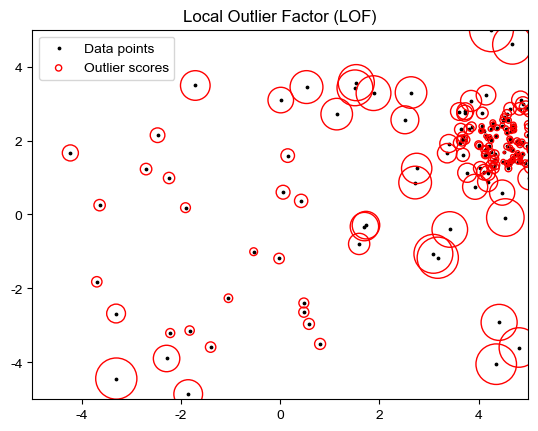

In [147]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection


def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])


plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
# plt.xlabel("prediction errors: %d" % (n_errors))
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()